<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tareaFinal_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA FINAL DE APRENDIZAJE AUTOMÁTICO**
## Universidad de Montevideo
## Ing. en Infórmatica - Sem 2, 2021
### Docente: Sebastián Garcia


## Grupo 2:
* Bruno Costanzo
* Renzo D'Ambrosio

#PARTE 1

Efectúe un profundo EDA del dataset entregado. En caso de que existan dudas de la semántica de alguno de los features del dataset, se recomienda fuertemente investigar sobre el mismo y documentar el resultado.

In [1]:
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
df_hf = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/heart_failure_clinical_records_dataset.csv', sep=',')
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df_hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df_hf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

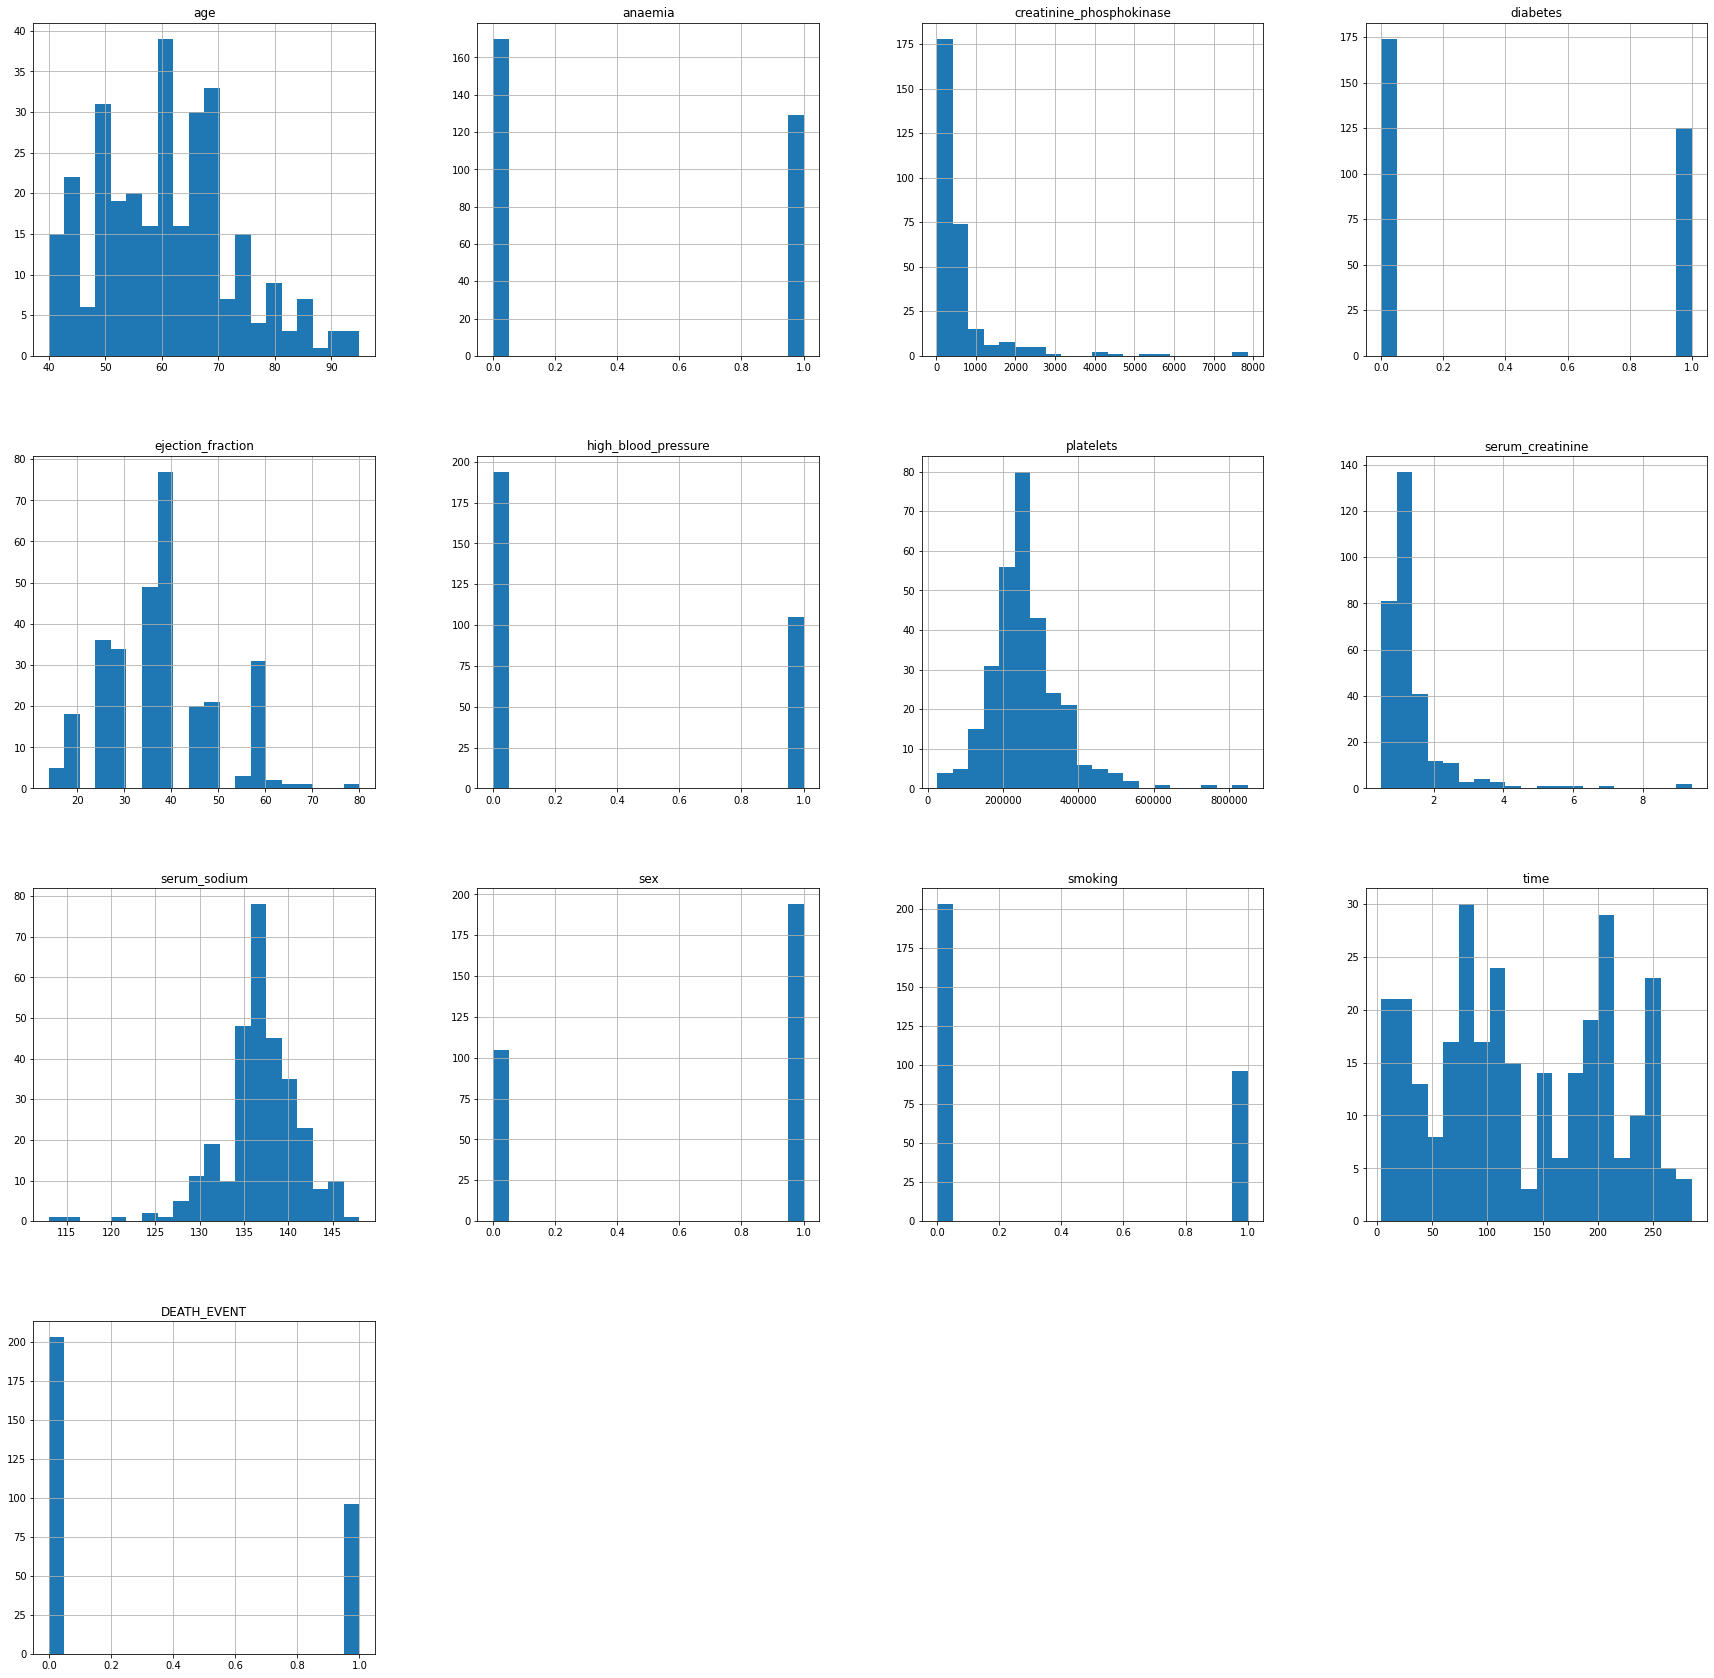

In [19]:
df_hf.hist(figsize=(30,30), bins=20)
plt.show()

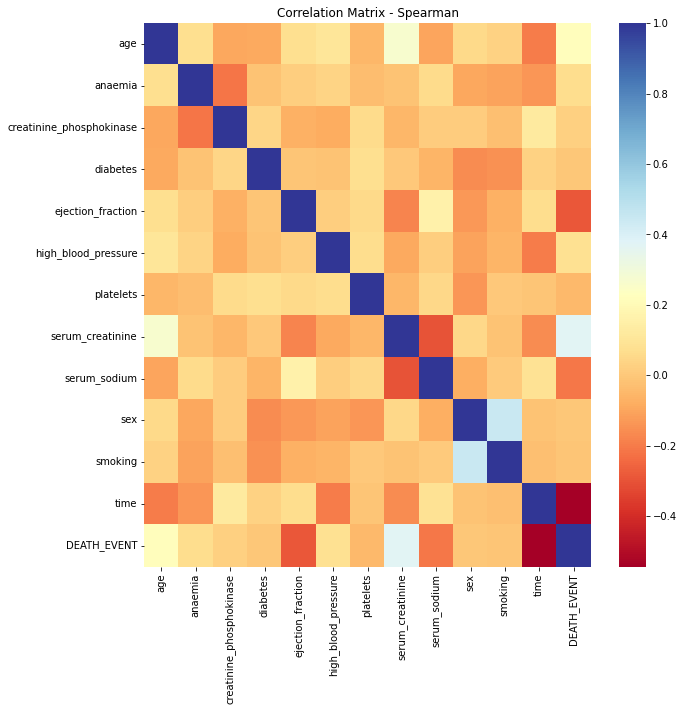

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_hf.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

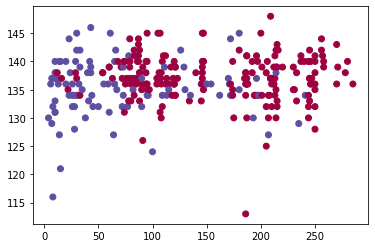

In [16]:
plt.scatter(df_hf['time'], df_hf['serum_sodium'], c=df_hf['DEATH_EVENT'], cmap=plt.cm.get_cmap('Spectral', 2))

In [17]:
df = px.data.iris()
fig = px.scatter_3d(df_hf, x='time', y='serum_sodium', z='ejection_fraction',
              color='DEATH_EVENT')
fig.show()

In [26]:
data = df_hf.drop(axis=1, columns='DEATH_EVENT').values
pca = PCA(n_components=3)
pca.fit(data)
data_PCA = pca.transform(data)

In [27]:
expl = pca.explained_variance_ratio_
print('Primeros 3 PCA:',sum(expl[0:3]))

Primeros 3 PCA: 0.9999999693653626


In [22]:
df_pca = pd.DataFrame(data_PCA)
df_pca['DEATH_EVENT'] = df_hf['DEATH_EVENT']
df = px.data.iris()
fig = px.scatter_3d(df_pca, x=0, y=1, z=2,
              color='DEATH_EVENT')
fig.show()

# Parte 2

Utilizando las técnicas vistas en el curso, detecte las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular

## KMEANS

Identificar cluster de 1s y ver caracteristicas

## Random Forest Tree

Armar el arbol y ver logicamente cuales hojas son muerte

# Parte 3

Para las poblaciones de mayor riesgo, en función de las respuestas obtenidas en el formulario de alta, determine el conjunto de resultados clínicos que el potencial asegurado debe entregar para avanzar en el proceso de obtención de la póliza.

# Parte 4

Para el conjunto de respuestas obtenidas en el formulario de alta, diseñe un modelo predictivo que determine si el potencial asegurado requiere de la realización de análisis clínicos adicionales o la póliza le será entregada sin averiguaciones adicionales. Documente detalladamente todas las decisiones tomadas.
Actualmente no existen formularios digitalizados con las respuestas de los asegurados, por lo que es necesario la generación de datos sintéticos que representen las distintas poblaciones. Esto datos serán los utilizados para el entrenamiento y test del modelo predictivo.